# 1. Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
plt.rcParams["figure.facecolor"] = "white"

# 2. Load dataset

In [2]:
home_dir = "$HOME"
local_dir = f"{home_dir}/Documents/github/CIV1498/projects/project2"
github_dir = f"{home_dir}/Documents/github/CIV1498-Project2"

# df_LA_parcels = pd.read_csv(f"{local_dir}/Assessor_Parcels_Data_-_2006_thru_2021.csv")
# df_LA_parcels_columns = pd.Series(df_LA_parcels.columns.to_list())
# df_LA_parcels_columns.to_pickle(f"{local_dir}/df_LA_parcels_columns.pkl")

## 2.1. See available columns in the dataset

In [3]:
df_LA_parcels_columns = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_columns.pkl")
df_LA_parcels_columns

0                         ZIPcode
1                TaxRateArea_CITY
2                             AIN
3                        RollYear
4                     TaxRateArea
5                      AssessorID
6                PropertyLocation
7                    PropertyType
8                 PropertyUseCode
9                  GeneralUseType
10                SpecificUseType
11             SpecificUseDetail1
12             SpecificUseDetail2
13           totBuildingDataLines
14                      YearBuilt
15             EffectiveYearBuilt
16                       SQFTmain
17                       Bedrooms
18                      Bathrooms
19                          Units
20                  RecordingDate
21                      LandValue
22                   LandBaseYear
23               ImprovementValue
24                    ImpBaseYear
25              TotalLandImpValue
26            HomeownersExemption
27            RealEstateExemption
28                   FixtureValue
29            

## 2.2. Filter "Residential" parcels only

In [4]:
df_LA_parcels_GeneralUseType = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_GeneralUseType.pkl")
Residential_index = df_LA_parcels_GeneralUseType[df_LA_parcels_GeneralUseType['GeneralUseType'] == 'Residential'].index
Residential_index.to_series().to_pickle(f"{local_dir}/index/Residential_index.pkl")

## 2.3. Filter "Single Family Residence (SFR)" parcels only

In [5]:
# df_LA_parcels_PropertyType = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_PropertyType.pkl")
# df_LA_parcels_SpecificUseType = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_SpecificUseType.pkl").loc[Residential_index]
# Residential_SFR_index = df_LA_parcels_SpecificUseType[df_LA_parcels_SpecificUseType['SpecificUseType'] == 'Single Family Residence'].index

df_LA_parcels_PropertyType = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_PropertyType.pkl").loc[Residential_index]
Residential_SFR_index = df_LA_parcels_PropertyType[df_LA_parcels_PropertyType['PropertyType'] == 'SFR'].index
Residential_SFR_index.to_series().to_pickle(f"{local_dir}/index/Residential_SFR_index.pkl")

## 2.4. Filter "Unit == 1" parcels only

In [6]:
df_LA_parcels_Units = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_Units.pkl").loc[Residential_SFR_index].astype(int)
Residential_SFR_Unit1_index = df_LA_parcels_Units[df_LA_parcels_Units['Units'] == 1].index
Residential_SFR_Unit1_index.to_series().to_pickle(f"{local_dir}/index/Residential_SFR_Unit1_index.pkl")

## 2.7. Get rid of parcels if "totBuildingDataLines != 1"

In [7]:
df_LA_parcels_totBuildingDataLines = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_totBuildingDataLines.pkl").loc[Residential_SFR_Unit1_index]
Residential_SFR_Unit1_1Building_index = df_LA_parcels_totBuildingDataLines[df_LA_parcels_totBuildingDataLines['totBuildingDataLines'] == 1].index
Residential_SFR_Unit1_1Building_index.to_series().to_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_index.pkl")

## 2.8. Get rid of unusual parcels based on PropertyUseCode

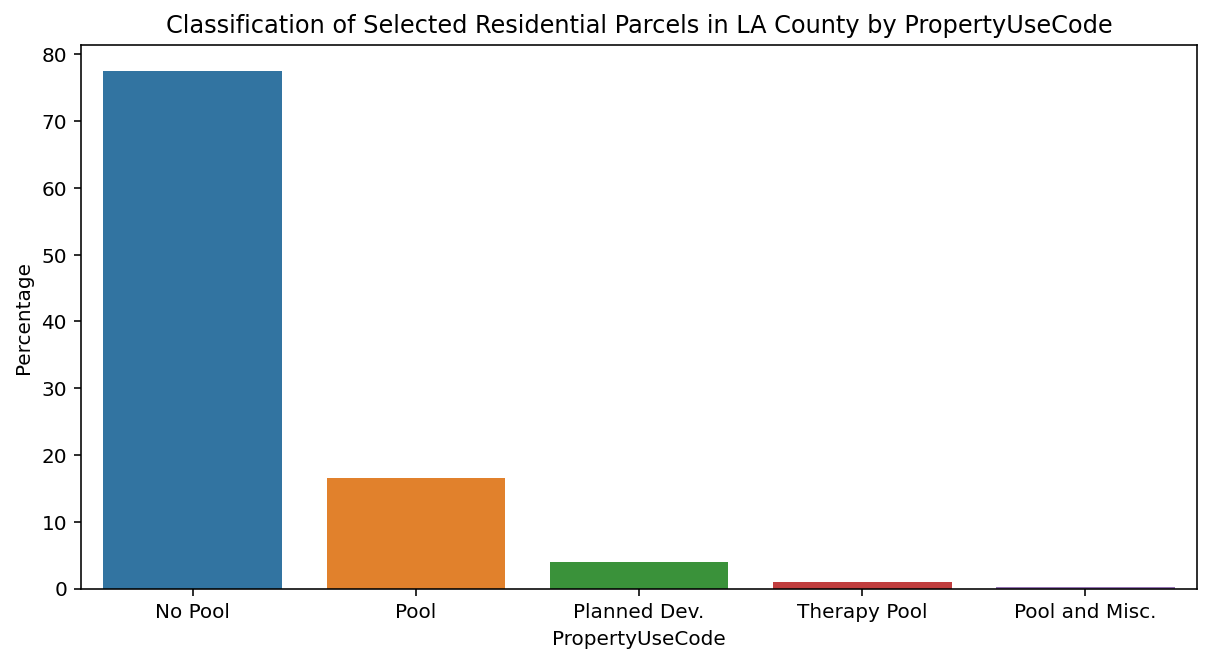

In [16]:
df_LA_parcels_PropertyUseCode = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_PropertyUseCode.pkl").loc[Residential_SFR_Unit1_1Building_index]
df_LA_parcels_PropertyUseCode_percentage = df_LA_parcels_PropertyUseCode.value_counts(normalize=True) * 100
df_LA_parcels_PropertyUseCode_percentage = df_LA_parcels_PropertyUseCode_percentage.to_frame("Percentage").reset_index()
Residential_SFR_Unit1_1Building_Regular_index = df_LA_parcels_PropertyUseCode[df_LA_parcels_PropertyUseCode['PropertyUseCode'].isin(["0100", "0101", "0103", "0104"])].index
Residential_SFR_Unit1_1Building_Regular_index.to_series().to_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_index.pkl")

plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_LA_parcels_PropertyUseCode_percentage.iloc[:5], x="PropertyUseCode", y="Percentage")
plt.title("Classification of Selected Residential Parcels in LA County by PropertyUseCode")
labels = ["No Pool", "Pool", "Planned Dev.", "Therapy Pool", "Pool and Misc."]
ax.set_xticklabels(labels);

## 2.9. Remove public parcels

In [17]:
df_LA_parcels_SpecialParcelClassification = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_SpecialParcelClassification.pkl").loc[Residential_SFR_Unit1_1Building_Regular_index]
Residential_SFR_Unit1_1Building_Regular_Private_index = df_LA_parcels_SpecialParcelClassification[(df_LA_parcels_SpecialParcelClassification['SpecialParcelClassification'] != "Public (non-taxable government-owned)") &
(df_LA_parcels_SpecialParcelClassification['SpecialParcelClassification'] != "Public Entity (Green Code)") & 
(df_LA_parcels_SpecialParcelClassification['SpecialParcelClassification'] != "State Board of Equilization Assessed")].index

Residential_SFR_Unit1_1Building_Regular_Private_index.to_series().to_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_Private_index.pkl")

## 2.10. Check if parcels are taxable

In [18]:
df_LA_parcels_isTaxableParcel = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_isTaxableParcel?.pkl").loc[Residential_SFR_Unit1_1Building_Regular_Private_index]
df_LA_parcels_isTaxableParcel.value_counts(normalize=True) * 100

isTaxableParcel?
Y                   100.0
dtype: float64

## 2.11. Filter parcels only in Los Angeles City (Based on ZIP code)

In [19]:
zip_codes_los_angeles_city = pd.read_csv(f"{local_dir}/geographic/Los_Angeles_City_Zip_Codes.csv")

df_LA_parcels_ZIPcode5 = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_ZIPcode5.pkl").loc[Residential_SFR_Unit1_1Building_Regular_Private_index].dropna().astype(int)
Residential_SFR_Unit1_1Building_Regular_Private_LACity_index = df_LA_parcels_ZIPcode5[df_LA_parcels_ZIPcode5["ZIPcode5"].isin(zip_codes_los_angeles_city["ZIP"])].index
Residential_SFR_Unit1_1Building_Regular_Private_LACity_index.to_series().to_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_Private_LACity_index.pkl")

## 2.12. Keep only RollYear 2021

In [20]:
df_LA_parcels_LandBaseYear = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_RollYear.pkl").loc[Residential_SFR_Unit1_1Building_Regular_Private_LACity_index]

Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_index = df_LA_parcels_LandBaseYear[df_LA_parcels_LandBaseYear["RollYear"] == 2021].index
Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_index.to_series().to_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_index.pkl")

## 2.13. Calculate min distance to the bus bench or subway stop

In [ ]:
from functions import haversine
from shapely.ops import nearest_points

# Import and save shape files
gdf_LA_city_bus_benches = gpd.read_file(f"{local_dir}/geographic/Bus_Stop_Benches.shp")[["NUMBER", "geometry"]]
gdf_LA_city_bus_benches.to_pickle(f"{local_dir}/geographic/gdf_LA_city_bus_benches.pkl")
bus_points = gdf_LA_city_bus_benches.geometry.unary_union

gdf_LA_city_subway_stops = gpd.read_file(f"{local_dir}/geographic/Metro_Rail_Lines_Stops.shp")[["StopNumber", "geometry"]]
gdf_LA_city_subway_stops = gdf_LA_city_subway_stops.drop_duplicates()
gdf_LA_city_subway_stops.to_pickle(f"{local_dir}/geographic/gdf_LA_city_subway_stops.pkl")
subway_points = gdf_LA_city_subway_stops.geometry.unary_union

# Import parcel dataframes
index = Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_index

df_LA_parcels_AIN = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_AIN.pkl").loc[index]
df_LA_parcels_CENTER_LAT = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_CENTER_LAT.pkl").loc[index]
df_LA_parcels_CENTER_LON = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_CENTER_LON.pkl").loc[index]

df_LAcity_parcels = pd.concat([df_LA_parcels_AIN,
                               df_LA_parcels_CENTER_LAT,
                               df_LA_parcels_CENTER_LON], axis=1)

# Remove parcels that do not have LAT and LON coordinates
df_LAcity_parcels.dropna(inplace=True)

# Create a geodataframe with parcel coordinates
gdf_LAcity_parcels = gpd.GeoDataFrame(df_LAcity_parcels, geometry=gpd.points_from_xy(df_LAcity_parcels["CENTER_LON"], df_LAcity_parcels["CENTER_LAT"]))

df_LAcity_parcels["BusBenchClosestDist"] = [haversine(nearest_points(row[1]["geometry"], bus_points)) for row in gdf_LAcity_parcels.iterrows()]
df_LAcity_parcels["SubwayStopClosestDist"] = [haversine(nearest_points(row[1]["geometry"], subway_points)) for row in gdf_LAcity_parcels.iterrows()]

df_LAcity_parcels[["BusBenchClosestDist", "SubwayStopClosestDist"]].to_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_closest_distance_BusSubway.pkl")
Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_closest_distance_BusSubway_index = df_LAcity_parcels.index
Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_closest_distance_BusSubway_index.to_series().to_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_closest_distance_BusSubway_index.pkl")

## 2.14. Locate neighborhood of each parcel

In [ ]:
gdf_LA_city_neigborhoods = gpd.read_file(f"{local_dir}/geographic/cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.shp")

index = pd.read_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_closest_distance_BusSubway_index.pkl")

df_LA_parcels_AIN = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_AIN.pkl").loc[index]
df_LA_parcels_CENTER_LAT = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_CENTER_LAT.pkl").loc[index]
df_LA_parcels_CENTER_LON = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_CENTER_LON.pkl").loc[index]

df_LAcity_parcels = pd.concat([df_LA_parcels_AIN,
                               df_LA_parcels_CENTER_LAT,
                               df_LA_parcels_CENTER_LON], axis=1)

df_LAcity_parcels.dropna(inplace=True)
gdf_LAcity_parcels = gpd.GeoDataFrame(df_LAcity_parcels, geometry=gpd.points_from_xy(df_LAcity_parcels["CENTER_LON"], df_LAcity_parcels["CENTER_LAT"]))

gdf_LAcity_parcels["Neighborhood"] = np.nan
for row in gdf_LAcity_parcels.iterrows():
    dummy = gdf_LA_city_neigborhoods[gdf_LA_city_neigborhoods.geometry.contains(row[1]["geometry"])]["name"].to_list()
    if len(dummy) > 0:
        gdf_LAcity_parcels.loc[row[0], "Neighborhood"] = dummy

df_LAcity_parcels_neighborhood = gdf_LAcity_parcels.drop(columns=["CENTER_LAT", "CENTER_LON", "geometry", "AIN"])
df_LAcity_parcels_neighborhood.to_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_neighborhood.pkl")       

## 2.15. Combine and merge filtered dataframes

In [ ]:
index_final = pd.read_pickle(f"{local_dir}/index/Residential_SFR_Unit1_1Building_Regular_Private_LACity_Roll2021_closest_distance_BusSubway_index.pkl")

df_LA_parcels_AIN = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_AIN.pkl").loc[index_final]
df_LA_parcels_LandValue = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_LandValue.pkl").loc[index_final]
df_LA_parcels_LandValue["LandValue"] = df_LA_parcels_LandValue["LandValue"].str.replace(",", "").astype(float)
df_LA_parcels_LandBaseYear = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_LandBaseYear.pkl").loc[index_final]
df_LA_parcels_TotalValue = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_TotalValue.pkl").loc[index_final]
df_LA_parcels_TotalValue["TotalValue"] = df_LA_parcels_TotalValue["TotalValue"].str.replace(",", "").astype(float)
df_LA_parcels_SQFTmain = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_SQFTmain.pkl").loc[index_final]
df_LA_parcels_SQFTmain["SQFTmain"] = df_LA_parcels_SQFTmain["SQFTmain"].str.replace(",", "").astype(float)
df_LA_parcels_Bedrooms = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_Bedrooms.pkl").loc[index_final]
df_LA_parcels_Bathrooms = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_Bathrooms.pkl").loc[index_final]
df_LA_parcels_PropertyUseCode = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_PropertyUseCode.pkl").loc[index_final].astype(str)
df_LA_parcels_YearBuilt = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_YearBuilt.pkl").loc[index_final]
df_LA_parcels_EffectiveYearBuilt = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_EffectiveYearBuilt.pkl").loc[index_final]
df_LA_parcels_TaxRateArea = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_TaxRateArea.pkl").loc[index_final]
df_LA_parcels_Cluster = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_Cluster.pkl").loc[index_final]
df_LA_parcels_ZIPcode = pd.read_pickle(f"{local_dir}/dataframe/df_LA_parcels_ZIPcode.pkl").loc[index_final]
df_LA_parcels_ZIPcode[["ZIPcode5","ZIPcode4"]] = df_LA_parcels_ZIPcode["ZIPcode"].str.split('-', expand=True)
df_LA_parcels_ZIPcode = df_LA_parcels_ZIPcode.drop(columns=["ZIPcode"]).astype({"ZIPcode5": "int64"})
df_LAcity_parcels_closest_distance_BusSubway = pd.read_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_closest_distance_BusSubway.pkl")
df_LAcity_parcels_neighborhood = pd.read_pickle(f"{local_dir}/dataframe/df_LAcity_parcels_neighborhood.pkl")   
parcel_boundaries_LA_cleaned = pd.read_pickle(f"{local_dir}/geographic/parcel_boundaries_LA_cleaned.pkl")

df_LA_parcels_filted = pd.concat([df_LA_parcels_AIN,
                                  df_LA_parcels_SQFTmain,
                                  df_LA_parcels_Bedrooms,
                                  df_LA_parcels_Bathrooms,
                                  df_LA_parcels_LandValue, 
                                  df_LA_parcels_LandBaseYear, 
                                  df_LA_parcels_TotalValue,
                                  df_LA_parcels_YearBuilt,
                                  df_LA_parcels_EffectiveYearBuilt,
                                  df_LA_parcels_PropertyUseCode,
                                  df_LA_parcels_TaxRateArea,
                                  df_LA_parcels_Cluster,
                                  df_LA_parcels_ZIPcode,
                                  df_LAcity_parcels_closest_distance_BusSubway,
                                  df_LAcity_parcels_neighborhood
                                  ], axis=1).merge(parcel_boundaries_LA_cleaned, how="left", on="AIN")

df_LA_parcels_LAcity_filted = df_LA_parcels_filted.dropna(subset=["Neighborhood"])
df_LA_parcels_LAcity_filted.to_pickle(f"{local_dir}/dataframe/df_LA_parcels_LAcity_filtered.pkl", compression="gzip")
df_LA_parcels_LAcity_filted.to_pickle(f"{github_dir}/dataframes/df_LA_parcels_LAcity_filtered_REV2_MB.pkl", compression="gzip")
df_LA_parcels_LAcity_filted.info()